# Question 1

## Nominal Variables
- sex (Male/Female)
- location (Cleveland)
- cp (chest pain type: typical angina, atypical angina, non-anginal, asymptomatic)
- restecg (normal, lv hypertrophy)
- exang (TRUE/FALSE for exercise induced angina)
- slope (upsloping, flat, downsloping)
- thal (normal, fixed defect, reversable defect)

## Ordinal Variables
- thalach_num (categorical number representing outcomes: 0,1,2,3)

## Interval Variables
- None identified in this dataset
(Note: While temperature would be an interval variable, this dataset doesn't contain temperature measurements)

## Ratio Variables
- age (years)
- trestbps (resting blood pressure)
- chol (cholesterol)
- fbs (fasting blood sugar)
- oldpeak (ST depression)
- restecg numerical measurements

# question 2

In [12]:
import pandas as pd


df = pd.read_csv('heart_disease.csv')



summary_stats = {}


def calculate_range(series):
    return series.max() - series.min()


for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        
        central_tendency = df[column].mean()
        std_dev = df[column].std()
        value_range = calculate_range(df[column])
    else:
        
        central_tendency = df[column].mode()[0]
        std_dev = 'N/A'
        value_range = 'N/A'
    
    summary_stats[column] = {
        'Central Tendency': central_tendency,
        'Standard Deviation': std_dev,
        'Range': value_range
    }


for column, stats in summary_stats.items():
    if column!='id':
        print(f"Column: {column}")
        print(f"  Central Tendency: {stats['Central Tendency']}")
        print(f"  Standard Deviation: {stats['Standard Deviation']}")
        print(f"  Range: {stats['Range']}\n")

Column: age
  Central Tendency: 53.51086956521739
  Standard Deviation: 9.424685209576857
  Range: 49

Column: sex
  Central Tendency: Male
  Standard Deviation: N/A
  Range: N/A

Column: dataset
  Central Tendency: Cleveland
  Standard Deviation: N/A
  Range: N/A

Column: cp
  Central Tendency: asymptomatic
  Standard Deviation: N/A
  Range: N/A

Column: trestbps
  Central Tendency: 132.13240418118468
  Standard Deviation: 19.066069518587476
  Range: 200.0

Column: chol
  Central Tendency: 199.13033707865168
  Standard Deviation: 110.7808103532305
  Range: 603.0

Column: fbs
  Central Tendency: False
  Standard Deviation: N/A
  Range: N/A

Column: restecg
  Central Tendency: normal
  Standard Deviation: N/A
  Range: N/A

Column: thalch
  Central Tendency: 137.5456647398844
  Standard Deviation: 25.926276492797594
  Range: 142.0

Column: exang
  Central Tendency: False
  Standard Deviation: N/A
  Range: N/A

Column: oldpeak
  Central Tendency: 0.8787878787878788
  Standard Deviation: 1

# Question 3

In [13]:
df = pd.read_csv('heart_disease.csv')

df = df.drop_duplicates()


missing_values = df.isnull().sum()


duplicate_rows = df.duplicated().sum()


data_types = df.dtypes


outliers = df.describe()


categorical_columns = df.select_dtypes(include=['object']).columns
categorical_values = {col: df[col].unique() for col in categorical_columns}

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')


numerical_df = df.select_dtypes(include=['int64', 'float64'])

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]


df['sex'] = df['sex'].str.lower()


print(df.head())

      id  age   sex    dataset               cp  trestbps   chol    fbs  \
166  167   52  male  Cleveland      non-anginal     138.0  223.0  False   
192  193   43  male  Cleveland     asymptomatic     132.0  247.0   True   
287  288   58  male  Cleveland  atypical angina     125.0  220.0  False   
302  303   38  male  Cleveland      non-anginal     138.0  175.0  False   
303  304   28  male  Cleveland  atypical angina     130.0  132.0  False   

            restecg  thalch  exang  oldpeak      slope        ca  \
166          normal   169.0  False      0.0  upsloping  0.676375   
192  lv hypertrophy   143.0   True      0.1       flat  0.676375   
287          normal   144.0  False      0.4       flat  0.676375   
302          normal   173.0  False      0.0  upsloping  0.676375   
303  lv hypertrophy   185.0  False      0.0       flat  0.676375   

                  thal  num  
166             normal    0  
192  reversable defect    1  
287  reversable defect    0  
302             norm

/tmp/ipykernel_653464/370919874.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/370919874.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# question 4

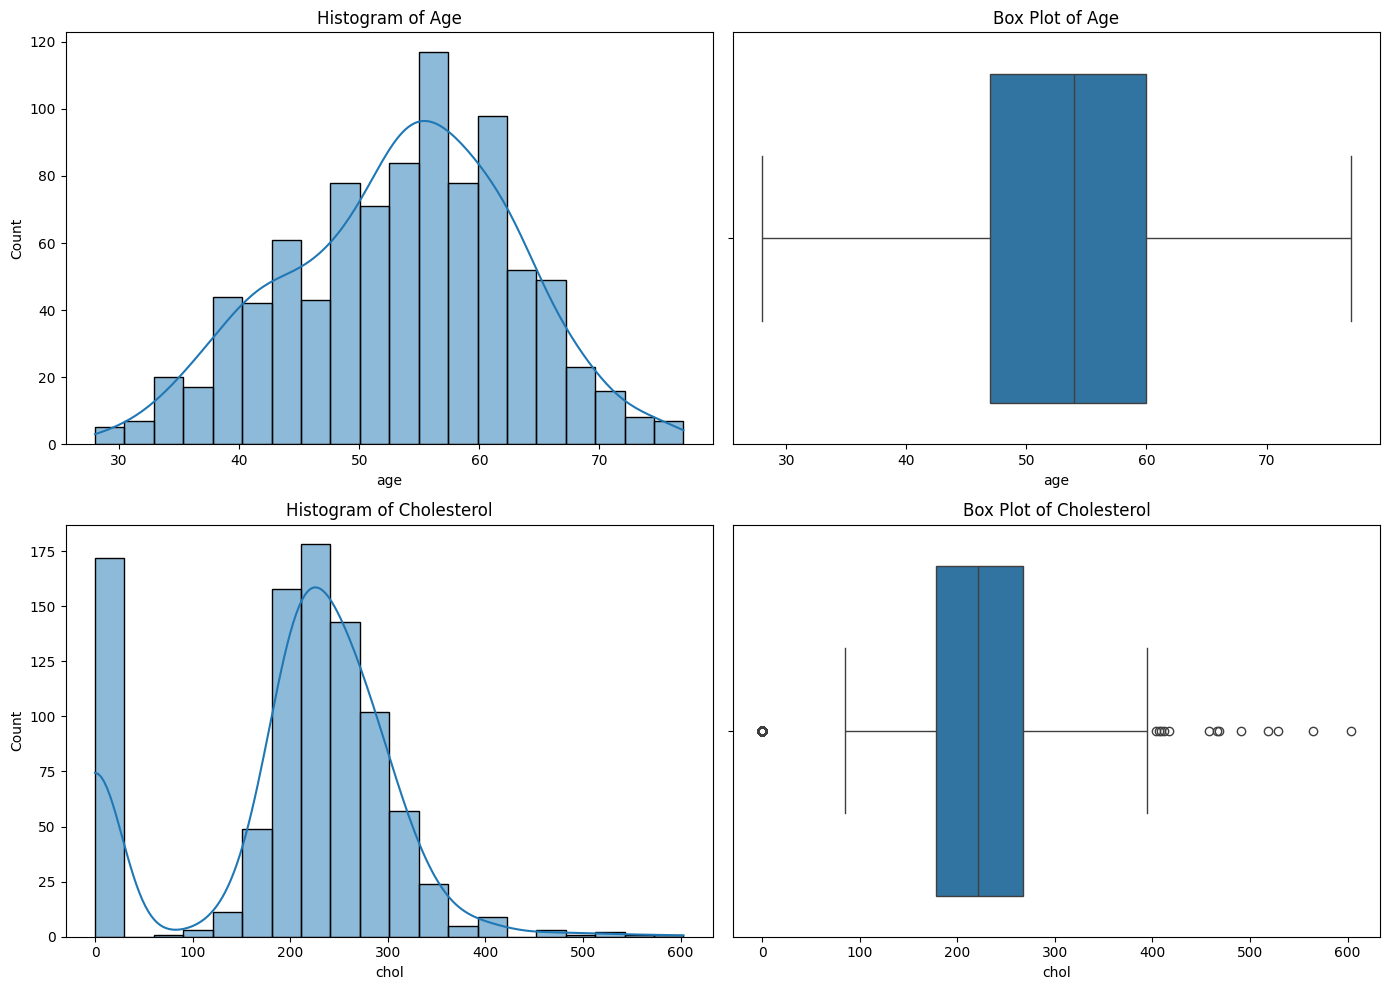

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')

sns.boxplot(x=df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Age')

sns.histplot(df['chol'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Cholesterol')

sns.boxplot(x=df['chol'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Cholesterol')

plt.tight_layout()
plt.show()


# Question 5

/tmp/ipykernel_653464/1713404701.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/1713404701.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

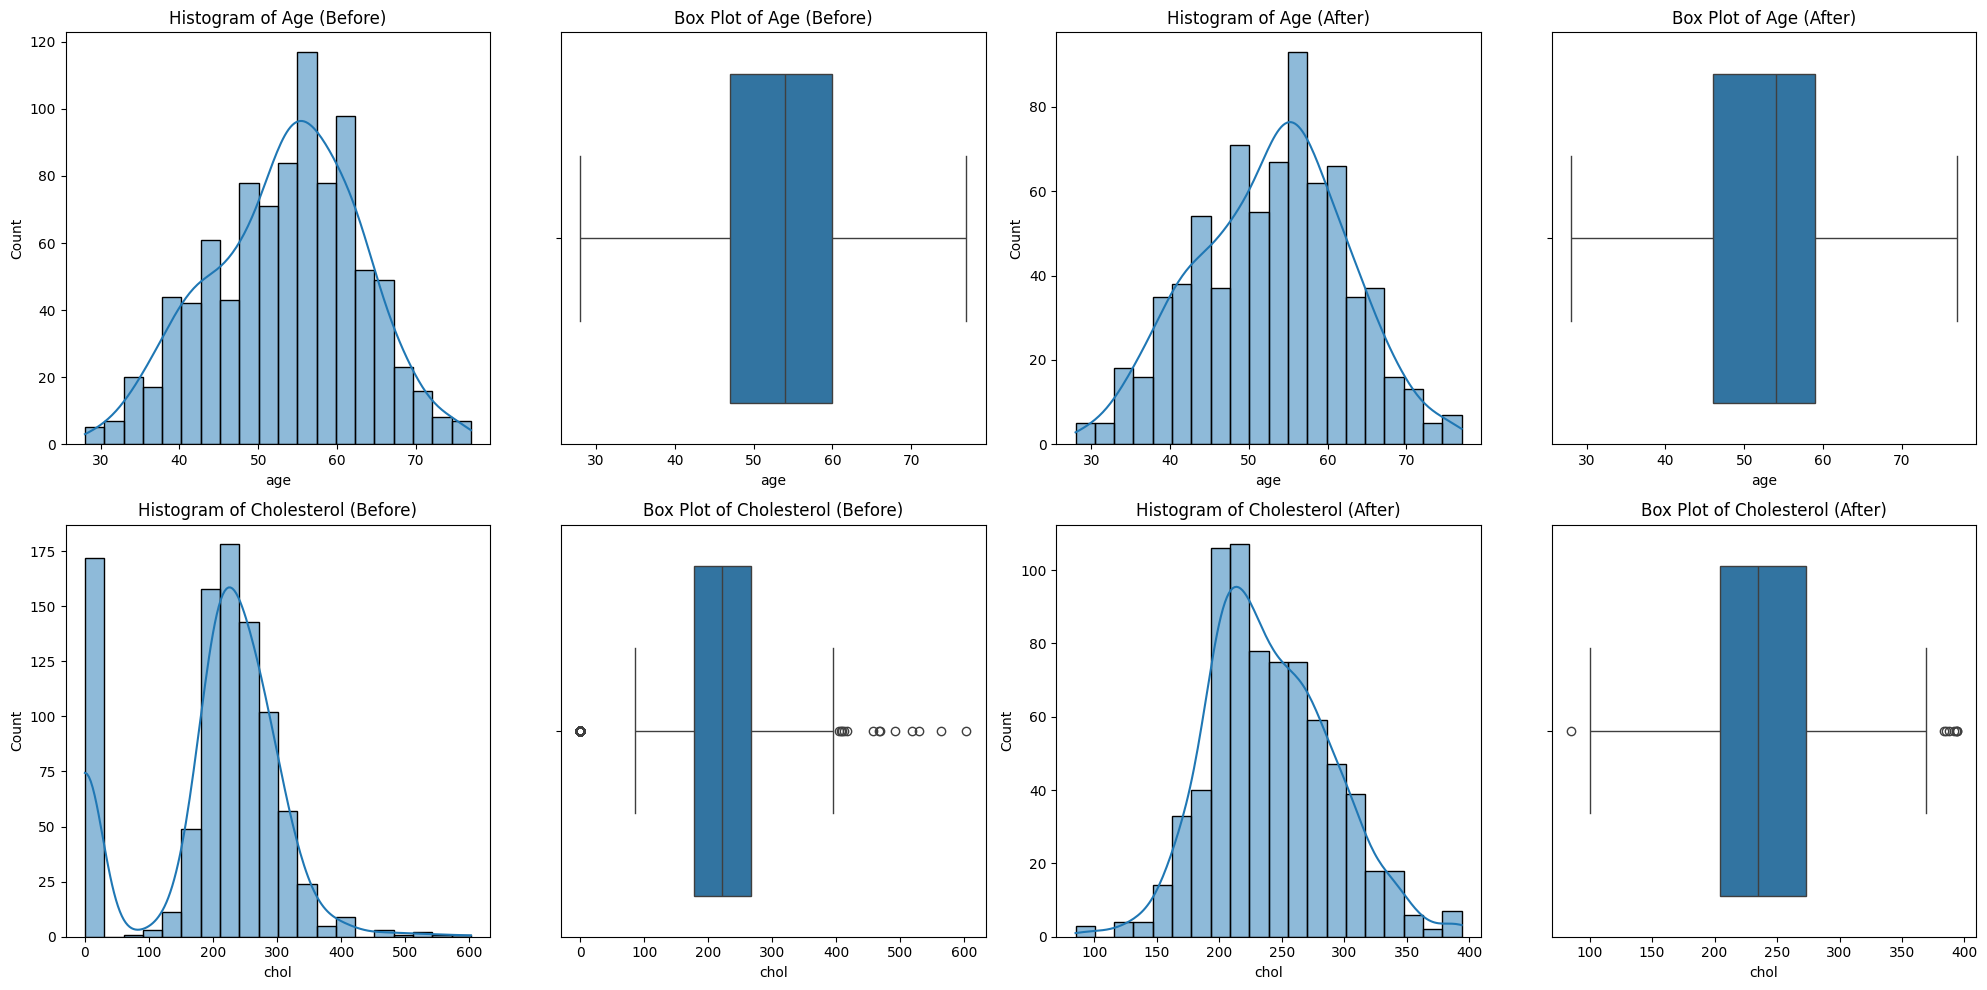

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_disease.csv')

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_no_outliers = df.copy()
df_no_outliers = remove_outliers(df_no_outliers, 'age')
df_no_outliers = remove_outliers(df_no_outliers, 'chol')

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age (Before)')

sns.boxplot(x=df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Age (Before)')

sns.histplot(df['chol'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Cholesterol (Before)')

sns.boxplot(x=df['chol'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Cholesterol (Before)')

sns.histplot(df_no_outliers['age'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of Age (After)')

sns.boxplot(x=df_no_outliers['age'], ax=axes[0, 3])
axes[0, 3].set_title('Box Plot of Age (After)')

sns.histplot(df_no_outliers['chol'], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Histogram of Cholesterol (After)')

sns.boxplot(x=df_no_outliers['chol'], ax=axes[1, 3])
axes[1, 3].set_title('Box Plot of Cholesterol (After)')

plt.tight_layout()
plt.show()


# question 6

/tmp/ipykernel_653464/1647323222.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/1647323222.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

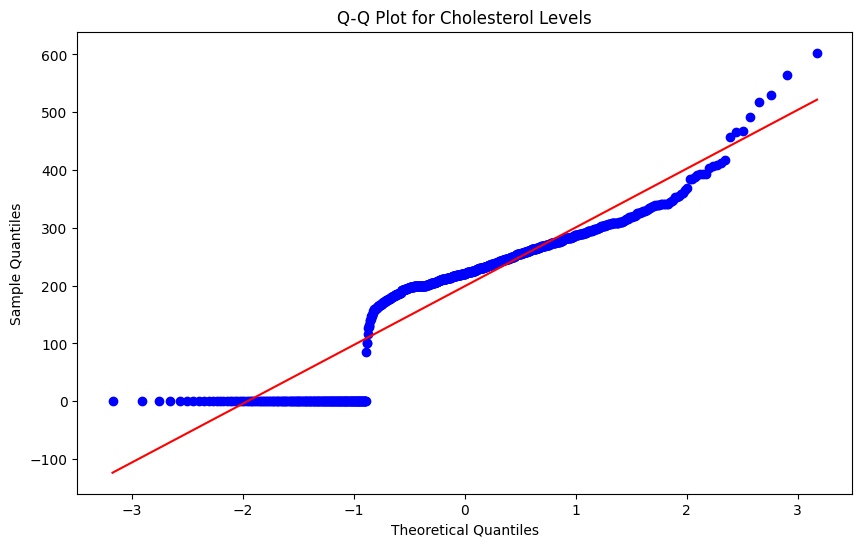

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

plt.figure(figsize=(10, 6))
stats.probplot(df['chol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Cholesterol Levels')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


# Question 7

/tmp/ipykernel_653464/1806131018.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/1806131018.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

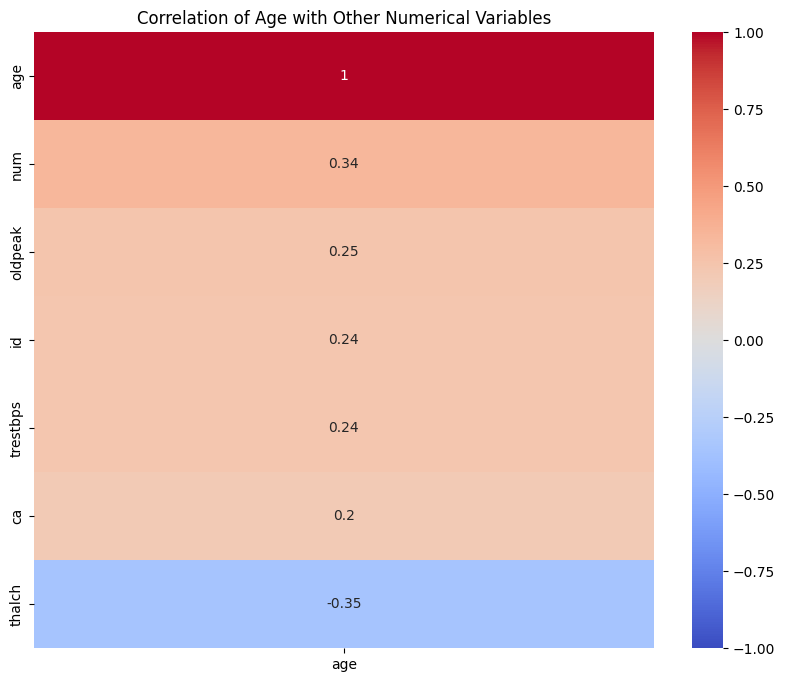

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')

numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
age_correlation = correlation_matrix[['age']].sort_values(by='age', ascending=False)

correlation_threshold = 0.1
significant_correlations = age_correlation[abs(age_correlation['age']) > correlation_threshold]

plt.figure(figsize=(10, 8))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Age with Other Numerical Variables')
plt.show()


# Question 8

/tmp/ipykernel_682848/1783792876.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_682848/1783792876.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Column names in the dataset: Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


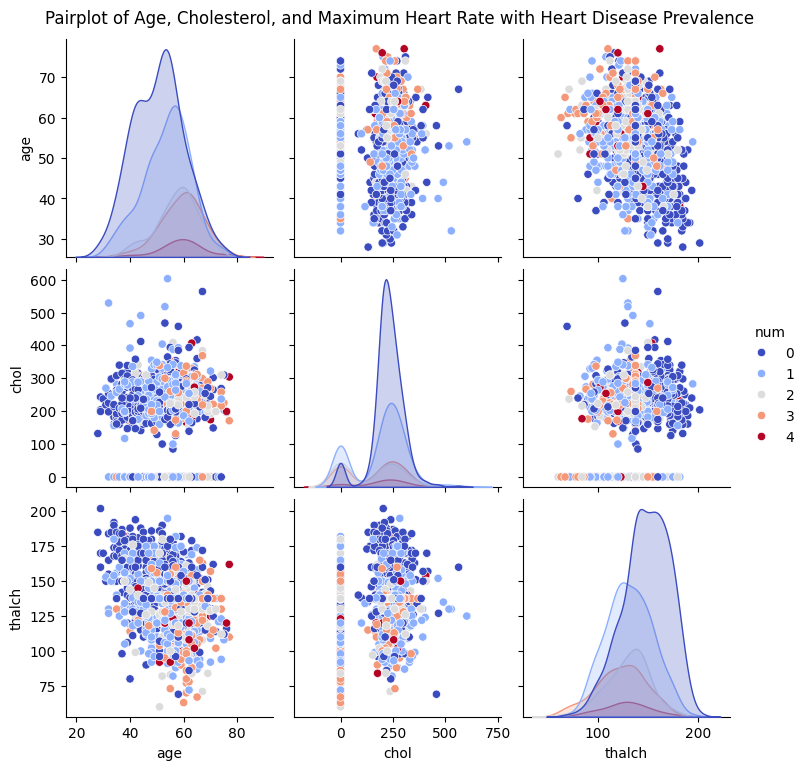

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

print("Column names in the dataset:", df.columns)

if 'thalch' in df.columns:
    sns.pairplot(df, vars=['age', 'chol', 'thalch'], hue='num', palette='coolwarm')
    plt.suptitle('Pairplot of Age, Cholesterol, and Maximum Heart Rate with Heart Disease Prevalence', y=1.02)
    plt.show()
else:
    print("Column 'thal' not found in the dataset.")


# Question 9

Null Hypothesis (H₀): There is no significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease.

Alternative Hypothesis (H₁): There is a significant difference in the mean cholesterol levels between individuals with heart disease and those without heart disease.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     920 non-null    int64  
 1   chol    890 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.5 KB
None

Value counts for 'num':
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Missing values:
num      0
chol    30
dtype: int64

Group sizes:
Heart disease group size: 498
No heart disease group size: 392

t-statistic: -7.0615
p-value: 0.0000
Reject the null hypothesis. There is a significant difference in mean cholesterol levels between the two groups.


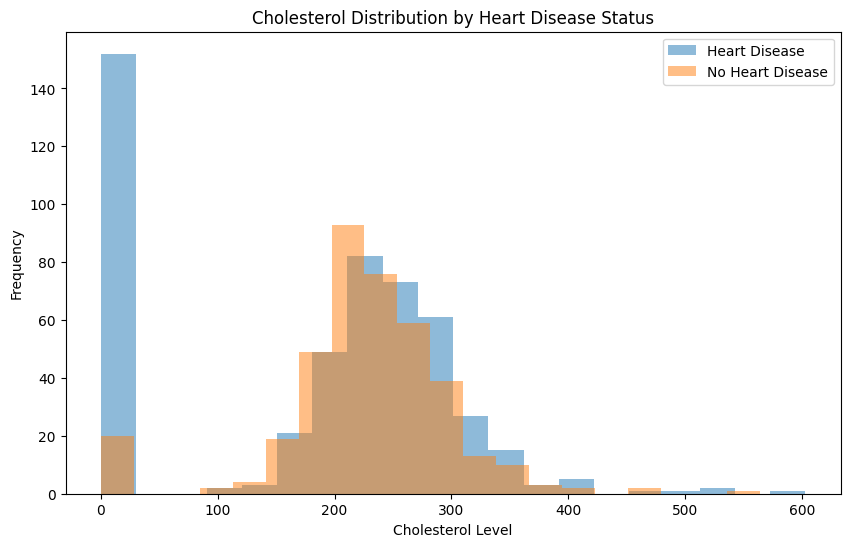

In [19]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('./heart_disease.csv')

print("Dataset Info:")
print(df[['num', 'chol']].info())
print("\nValue counts for 'num':")
print(df['num'].value_counts())

print("\nMissing values:")
print(df[['num', 'chol']].isnull().sum())

df_clean = df.dropna(subset=['num', 'chol'])

heart_disease_group = df_clean[df_clean['num'] > 0]['chol'].values
no_heart_disease_group = df_clean[df_clean['num'] == 0]['chol'].values

print("\nGroup sizes:")
print(f"Heart disease group size: {len(heart_disease_group)}")
print(f"No heart disease group size: {len(no_heart_disease_group)}")

if len(heart_disease_group) > 0 and len(no_heart_disease_group) > 0:
    t_stat, p_value = stats.ttest_ind(heart_disease_group, no_heart_disease_group)
    
    print(f"\nt-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in mean cholesterol levels between the two groups.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in mean cholesterol levels between the two groups.")
else:
    print("\nError: One or both groups are empty. Please check your data classification.")

plt.figure(figsize=(10, 6))
plt.hist(heart_disease_group, bins=20, alpha=0.5, label='Heart Disease')
plt.hist(no_heart_disease_group, bins=20, alpha=0.5, label='No Heart Disease')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.show()


# Question 10

In [20]:
import numpy as np

heart_disease_group = df[df['num'] > 0]['chol']
no_heart_disease_group = df[df['num'] == 0]['chol']

n1 = len(heart_disease_group)
n2 = len(no_heart_disease_group)
s1 = heart_disease_group.std()
s2 = no_heart_disease_group.std()

sp = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

se = sp * np.sqrt(1/n1 + 1/n2)

df = n1 + n2 - 2

t_critical = stats.t.ppf(1 - alpha/2, df)

margin_of_error = t_critical * se

print("Margin of Error:", margin_of_error)


Margin of Error: 13.99714296485588


# Question 11

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')

features = ['age', 'trestbps', 'thalch', 'oldpeak', 'ca', 'num']
target = 'chol'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 10796.089032439495
Root Mean Squared Error (RMSE): 103.90423009887276
R-squared (R2): 0.08647049464466738


/tmp/ipykernel_653464/449573675.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/449573675.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# Question 12

In [22]:
import pandas as pd

df = pd.read_csv('heart_disease.csv')
df = df.drop_duplicates()

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

df['age'] = pd.to_numeric(df['age'], errors='coerce')

df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-40', '41-50', '51-60', '61-70', '71-80'])

df['bp_category'] = pd.cut(df['trestbps'], bins=[0, 120, 129, 139, 180, 300], labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'])

df['st_depression'] = df['oldpeak'] > 1.0

df['age_trestbps'] = df['age'] * df['trestbps']
df['age_chol'] = df['age'] * df['chol']
df['age_thalach'] = df['age'] * df['thalch']

print(df.head())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  ...        slope   ca               thal  num  \
0  lv hypertrophy   150.0  ...  downsloping  0.0       fixed defect    0   
1  lv hypertrophy   108.0  ...         flat  3.0             normal    2   
2  lv hypertrophy   129.0  ...         flat  2.0  reversable defect    1   
3          normal   187.0  ...  downsloping  0.0             normal    0   
4  lv hypertrophy   172.0  ...    upsloping  0.0             normal    0   

  age_group           bp_category st_depression age_trestbps  age_chol  \
0     61-70  Hypertensio

/tmp/ipykernel_653464/1452913417.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_653464/1452913417.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)